In [1]:
from pathlib import Path
import sys
import json
from dataclasses import dataclass, field
from typing import Optional, Sequence

import numpy as np
import scipy.constants as spc
import matplotlib.pyplot as plt

NOTEBOOK_DIR = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
SRC_ROOT = NOTEBOOK_DIR.parent
if str(SRC_ROOT) not in sys.path:
    sys.path.insert(0, str(SRC_ROOT))

from negf.self_energy.surface import surface_greens_function
from negf.self_energy.greens_functions import surface_greens_function_nn
KB_OVER_Q = spc.Boltzmann / spc.elementary_charge

In [2]:
import numpy as np

g_surface = surface_greens_function(0.001, np.array([[0.0]]), np.array([[-1.0]]))
g_surface = surface_greens_function_nn(0.00, np.array([[-1.0]]),np.array([[0.0]]), np.array([[-1.0]]))
print(g_surface)

(array([[0.-0.99995005j]]), array([[0.-0.99994999j]]))


In [12]:
def sigma_analytic(E: float, eps0: float, t: float, eta: float = 1e-12) -> complex:
    z = E + 1j * eta - eps0
    disc = z * z - 4.0 * t * t
    root = np.lib.scimath.sqrt(disc)
    if np.imag(root) < 0.0:
        root = -root
    g_surface = (z - root) / (2.0 * t * t)
    return t * t * g_surface

energies = np.linspace(-3.0, 3.0, 201)
eps0 = 0.0
t = -1.0
eta = 1e-9
sigma_num = []
sigma_ana = []
for E in energies:
    g_num = surface_greens_function_nn(E, np.array([[t]]),np.array([[eps0]]), np.array([[t]]))
    sigma_num.append(g_num[0][0])
    
    sigma_ana.append(sigma_analytic(E, eps0, t, eta))
sigma_num = np.array(sigma_num)
sigma_ana = np.array(sigma_ana)
np.max(np.abs(sigma_num - sigma_ana))

np.float64(1.9796488654855369)

In [13]:
import matplotlib.pyplot as plt

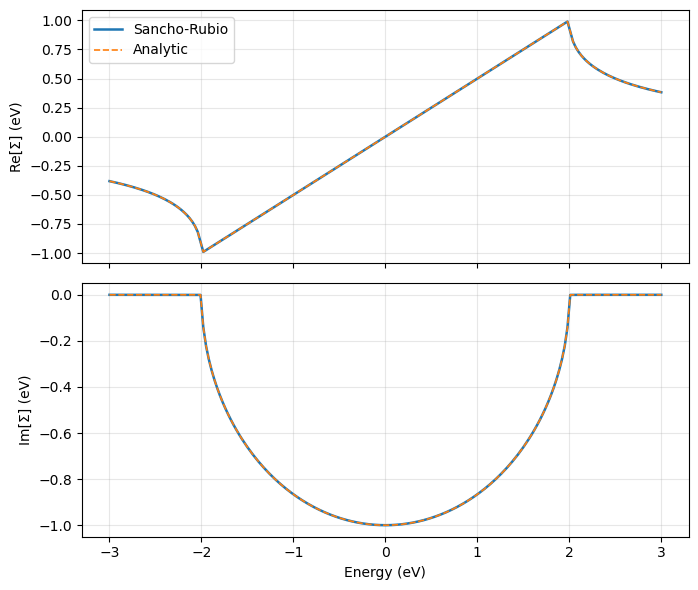

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

axs[0].plot(energies, sigma_num.real, label="Sancho-Rubio", lw=1.8)
axs[0].plot(energies, sigma_ana.real, "--", label="Analytic", lw=1.2)
axs[0].set_ylabel("Re[Σ] (eV)")
axs[0].legend()
axs[0].grid(True, alpha=0.3)

axs[1].plot(energies, sigma_num.imag, label="Sancho-Rubio", lw=1.8)
axs[1].plot(energies, sigma_ana.imag, "--", label="Analytic", lw=1.2)
axs[1].set_ylabel("Im[Σ] (eV)")
axs[1].set_xlabel("Energy (eV)")
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()